<AxesSubplot:>

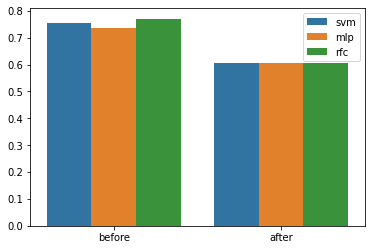

In [4]:
import pandas as pd
import numpy as np
import sklearn



heart_dis = pd.read_csv('heart disease classification dataset.csv')
heart_dis.head()

heart_dis.shape

heart_dis.isnull().sum()

heart_dis = heart_dis.drop(['Unnamed: 0'], axis =1)
heart_dis.shape

from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')
impute.fit(heart_dis[['trestbps']])
heart_dis['trestbps'] = impute.transform(heart_dis[['trestbps']])

from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')
impute.fit(heart_dis[['chol']])
heart_dis['chol'] = impute.transform(heart_dis[['chol']])

from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')
impute.fit(heart_dis[['thalach']])
heart_dis['thalach'] = impute.transform(heart_dis[['thalach']])

heart_dis.isnull().sum()

heart_dis.head()

heart_dis['sex'].unique()

heart_dis['target'].unique()

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
heart_dis['sex'] = encode.fit_transform(heart_dis['sex'])

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
heart_dis['target'] = encode.fit_transform(heart_dis['target'])

heart_dis.head()

from sklearn.model_selection import train_test_split

X = heart_dis.drop('target',axis = 1)
y = heart_dis['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
#X_train.shape
#X_test.shape

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train
X_test = scaler.transform(X_test)
X_test

from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)
beforeReductionSVM = svc.score(X_test, y_test)

from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(10), activation="relu", max_iter=10000)
nnc.fit(X_train, y_train)
beforeReductionMLP = nnc.score(X_test, y_test)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
beforeReductionRFC = rfc.score(X_test, y_test)

from sklearn.decomposition import PCA 
pca = PCA(n_components=6)
pca.fit(X_train)
X_train = pca.transform(X_train)
pca.fit(X_test)
X_test = pca.transform(X_test)

X_train.shape
X_test.shape

from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)
afterReductionSVM = svc.score(X_test, y_test)

from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(10), activation="relu", max_iter=10000)
nnc.fit(X_train, y_train)
afterReductionMLP = nnc.score(X_test, y_test)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
afterReductionRFC = rfc.score(X_test, y_test)

import seaborn as sn
compare_data = {'x': ['before', 'before', 'before','after', 'after', 'after'], 'y': [beforeReductionSVM, beforeReductionMLP, beforeReductionRFC,afterReductionSVM, afterReductionMLP, afterReductionRFC], 'category': ['svm', 'mlp', 'rfc', 'svm', 'mlp', 'rfc']}
sn.barplot(x='x', y='y', hue='category', data=compare_data)

<AxesSubplot:>

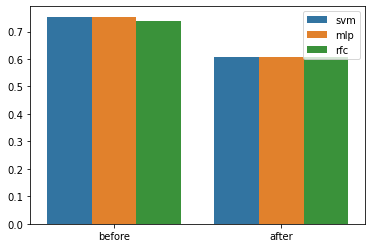